# **CS 1810 Homework 1**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever you use to run your code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary but can help prevent any issues due to package versions.

**The following notebook is meant to help you work through Problems 1, 3, and 4 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [8]:
# Loading data
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]


[[ 3.99946e+05  5.10000e-01]
 [ 4.09980e+05  1.57000e+00]
 [ 4.14882e+05  1.70000e-01]
 [ 4.19929e+05 -6.20000e-01]
 [ 4.30187e+05 -7.58000e+00]
 [ 4.40206e+05 -9.04000e+00]
 [ 4.49719e+05 -7.26000e+00]
 [ 4.60344e+05 -8.34000e+00]
 [ 4.64951e+05 -8.44000e+00]
 [ 4.69706e+05 -7.26000e+00]
 [ 4.80119e+05 -4.95000e+00]
 [ 5.05080e+05 -5.04000e+00]
 [ 5.10100e+05 -5.55000e+00]
 [ 5.14989e+05 -4.98000e+00]
 [ 5.20111e+05 -3.75000e+00]
 [ 5.25099e+05 -4.35000e+00]
 [ 5.29939e+05 -5.43000e+00]
 [ 5.34994e+05 -6.64000e+00]
 [ 5.39991e+05 -7.46000e+00]
 [ 5.44758e+05 -8.13000e+00]
 [ 5.49855e+05 -6.14000e+00]
 [ 5.54948e+05 -4.04000e+00]
 [ 5.60077e+05 -5.48000e+00]
 [ 5.64994e+05 -2.07000e+00]
 [ 5.75040e+05 -1.37000e+00]
 [ 5.80084e+05 -1.46000e+00]
 [ 5.84984e+05 -5.75000e+00]
 [ 5.89830e+05 -3.48000e+00]
 [ 5.94821e+05 -3.89000e+00]
 [ 6.00096e+05 -4.99000e+00]
 [ 6.04834e+05 -3.51000e+00]
 [ 6.25316e+05 -2.20000e+00]
 [ 6.29486e+05 -8.37000e+00]
 [ 6.39948e+05 -8.84000e+00]
 [ 6.45119e+05

# Problem 1

## Problem 1 Subpart 1(a)

In [5]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """

    # Compute distances, shape is (n, m) where n is the number of test points and m is the number of training points
    dists = np.abs(x_train.reshape(1,-1) - x_new.reshape(-1,1))
    # Argsort the rows
    ix = dists.argsort(axis = 1)
    ix = ix[:, :k] # take only the k smallest distances
    y = y_train[ix]

    # sum each row
    return np.mean(y, axis = 1)

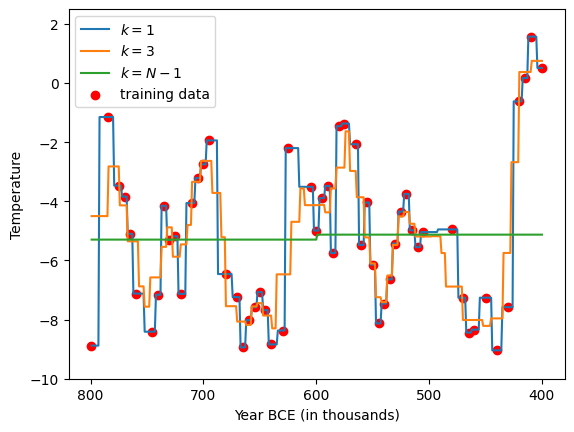

In [7]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("img_output/p1.1a.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 1(b)

In [25]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    # YOUR CODE HERE
    return np.mean((predictions - true)**2)


In [28]:
# Compute the MSEs for different values of k
# YOUR CODE HERE
min_k = float('inf')
min_mse = float('inf')
for k in range(1,N+1):
    pred = predict_knn(year_test, k, year_train, temp_train)
    mse = model_mse(pred, temp_test)
    # print(mse)
    if mse < min_mse:
        min_mse = mse
        min_k = k

print(min_k)
print(min_mse)
    



1
1.7406000000000004


## Problem 1 Subpart 2(a)

In [44]:
def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_new.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param x_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    # YOUR CODE HERE
   
    out = []
    for x in x_new:
        kern = np.exp(-((x_train - x)**2) / tau)
        out.append(np.dot(kern, y_train) / np.sum(kern))
        
    return np.array(out)




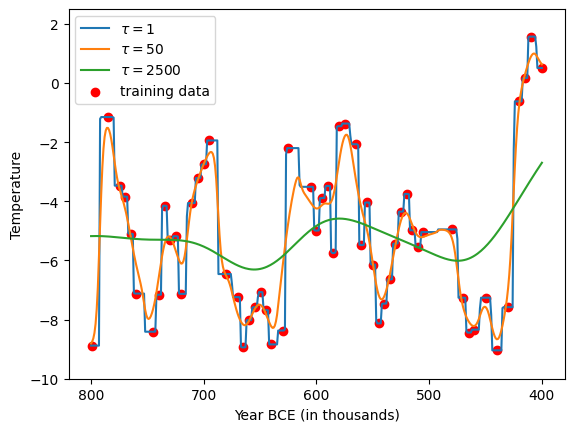

In [45]:
# Plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("img_output/p1.2a.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 2(c)

In [47]:
# Compute the MSEs for different values of tau
# YOUR CODE HERE
mse = []
for tau in [1, 50, 2500]:
    pred = kernel_regressor(year_test, tau, year_train, temp_train)
    mse.append((tau, model_mse(pred, temp_test)))

print (mse)


[(1, np.float64(1.9472621565209178)), (50, np.float64(1.8582899169613452)), (2500, np.float64(8.333886806980791))]


# Problem 3

## Problem 3 Subpart 1

In [48]:
def exp_kernel(x,mu):
    return np.exp(-1/float(5)*np.power(x-mu,2))

def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X

# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`

def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  phi_X = [np.ones(X.shape)]

  if part == 'a':
    for j in range(1,10):
      phi_X.append(X**j)
  elif part=='b':
    for j in range(1,10):
      mu = (j + 7) / 8
      phi_X.append(np.exp(-1/float(5)*np.power(X-mu,2)))
  elif part=='c':
    for j in range(1,10):
      phi_X.append(np.cos(X / j))
  elif part=='d':
    for j in range(1,50):
      phi_X.append(np.cos(X / j))

  return np.vstack(phi_X).T 

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [49]:
# Helper function to find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

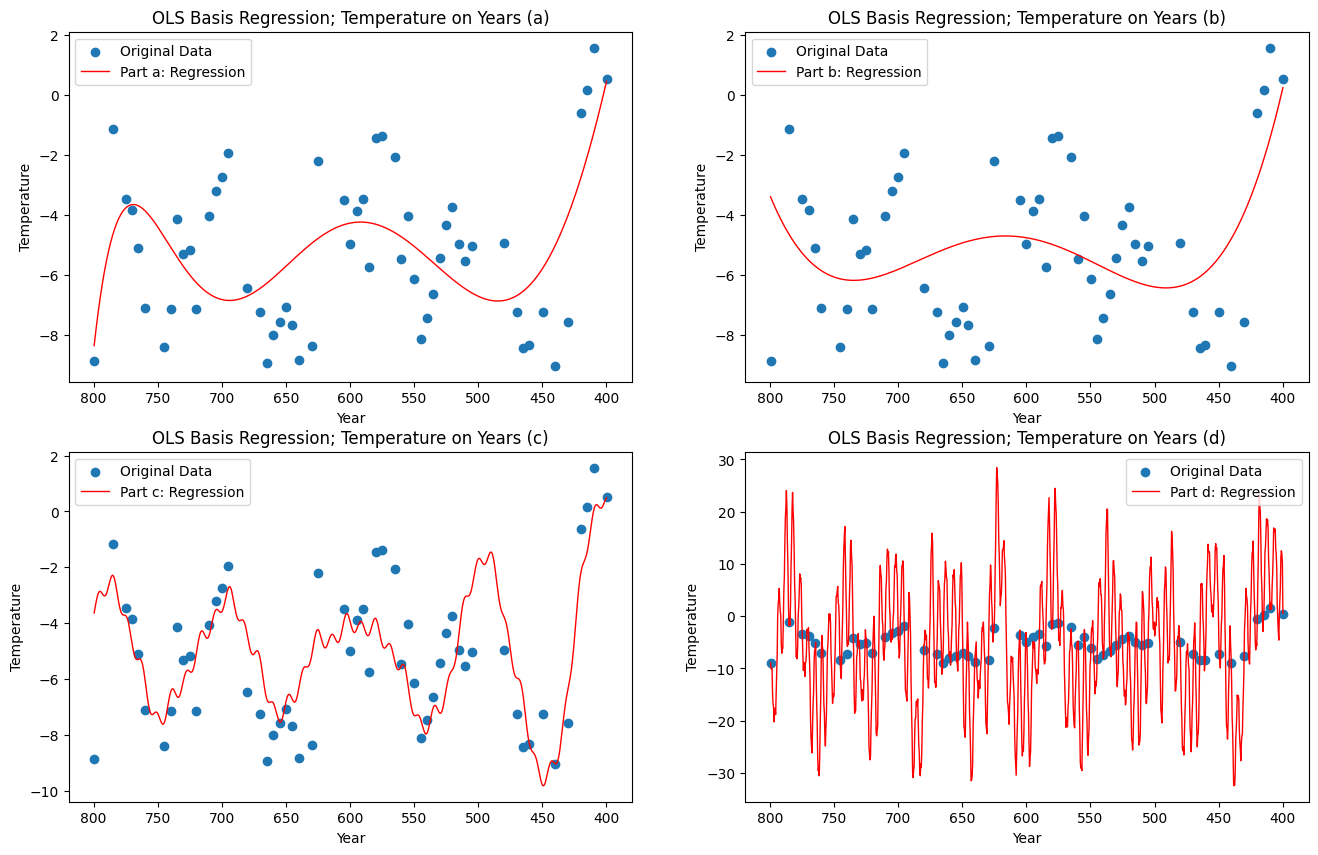

In [54]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  phi_years_train = make_basis(year_train, part)
  w = find_weights(phi_years_train, temp_train)

  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  
  xs = np.linspace(year_train.min(), year_train.max(), 1000)
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")

  # Plot the regression line
  phi_xs = make_basis(xs, part)
  temp_pred = phi_xs @ w
  ax[i//2, i%2].plot(xs, temp_pred, label=f"Part {part}: Regression", color="red", linewidth=1)
  
  ax[i//2, i%2].legend()
  ax[i//2, i%2].invert_xaxis()
  
plt.savefig("img_output/p3.1.png")

## Problem 3 Subpart 2

In [55]:
# Compute the MSE for each basis
# YOUR CODE HERE
for part in ["a", "b", "c", "d"]:
    phi_years_train = make_basis(year_train, part)
    w = find_weights(phi_years_train, temp_train)

    phi_xs = make_basis(year_test, part)
    temp_pred = phi_xs @ w

    mse = model_mse(temp_pred, temp_test)

    print(f"Part {part} MSE is {mse}")
    

Part a MSE is 7.955753263997866
Part b MSE is 8.708156256649762
Part c MSE is 5.967024534016804
Part d MSE is 58.90630394145523


# Problem 4

## Problem 4 Subpart 5

In [64]:
def find_lasso_weights(lam, X, y):
    """
    Fit the weights of a LASSO linear regression through the coordinate descent algorithm.

    :param lam: the lambda parameter
    :param X: the design matrix with training set features
    :param y: the training set labels
    :return: the fitted weights
    """
    # YOUR CODE HERE
    N, D = X.shape
    w = np.zeros(D)

    for i in range(5000):
        for d in range(D):
            x_d = X[:, d]
            rho_d = x_d.T @ (y - (X @ w) + (w[d] * x_d))

            if d == 0:
                w[d] = rho_d / (x_d.T @ x_d)
            else:
                w[d] = np.sign(rho_d) * max(abs(rho_d) - (lam / 2), 0) / (x_d.T @ x_d)
                
    return w


In [65]:
# Helper function for standardizing inputs to LASSO
def preprocess_lasso(X):
    X = make_basis(X, part='d')
    X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis = 0)) / X[:, 1:].std(axis = 0)
    return X

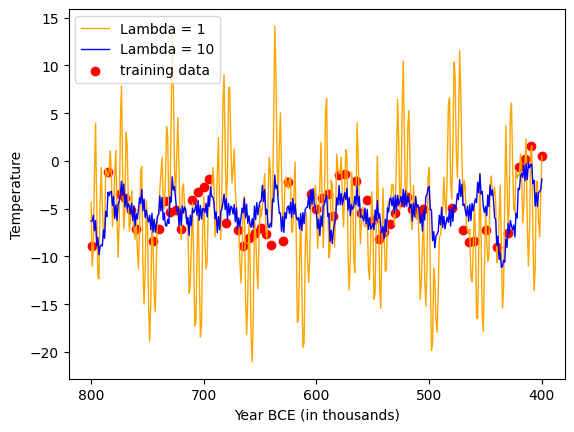

In [66]:
# Fit the weights for both models
phi_x_train = preprocess_lasso(year_train)
lam1, lam2 = 1, 10
w1 = find_lasso_weights(lam1, phi_x_train, temp_train)
w2 = find_lasso_weights(lam2, phi_x_train, temp_train)

# Plot functions
x_array = np.arange(400, 800 + 1, 1)
phi_x_array = preprocess_lasso(x_array)

# TODO: Plot the regression line generated by your model. 
# YOUR CODE HERE
y1 = phi_x_array @ w1
y2 = phi_x_array @ w2
plt.plot(x_array, y1, label=f"Lambda = 1", color="orange", linewidth=1)
plt.plot(x_array, y2, label=f"Lambda = 10", color="blue", linewidth=1)


plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p4.5.png
plt.savefig("img_output/p4.5.png", bbox_inches = "tight")
plt.show()

In [70]:
# Compute the MSE for both values of lambda
# YOUR CODE HERE
phi_x_train = preprocess_lasso(year_train)

for lam in [1,10]:
    w = find_lasso_weights(lam, phi_x_train, temp_train)

    phi_x_test = preprocess_lasso(year_test)
    
    temp_pred = phi_x_test @ w
    mse = model_mse(temp_pred, temp_test)
    print(f"Lambda = {lam} MSE = {mse}")


Lambda = 1 MSE = 30.06004861971841
Lambda = 10 MSE = 15.61835555996395
Lambda = 100 MSE = 9.578326603878116
